In [1]:
# PCA(Q_Ques), 통제변수, tpscore, human(engnat, familysize, hand 제외)
# LabelEncoding, Scaling

In [2]:
run profile1

In [40]:
# 1. 데이터 세팅
# 1) data loading
df1 = pd.read_csv('/Users/harryjeong/python_data/maki_train.csv', index_col = 0) 
df2 = pd.read_csv('/Users/harryjeong/python_data/maki_test_x.csv', index_col = 0)

In [41]:
# 2) labelencoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1['gender_code'] = label.fit_transform(df1['gender'])
df1['age_group_code'] = label.fit_transform(df1['age_group'])
df1['race_code'] = label.fit_transform(df1['race'])
df1['religion_code'] = label.fit_transform(df1['religion'])

df2['gender_code'] = label.fit_transform(df2['gender'])
df2['age_group_code'] = label.fit_transform(df2['age_group'])
df2['race_code'] = label.fit_transform(df2['race'])
df2['religion_code'] = label.fit_transform(df2['religion'])

# 라벨링한 변수들의 이전 형태는 제거
drop = ['gender','age_group','race','religion']
df1 = df1.drop(drop, axis = 1)
df2 = df2.drop(drop, axis = 1)

In [42]:
# 3) 변수제거1 : Q_Time 제거
# Q_Ques : Q 변수 중 질문만
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

# Q_Time : Q 변수 중 소요시간만
Q_Time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

# scoring 했기에 기존 데이터는 삭제 (Q_Time)
df1 = df1.drop(Q_Time, axis = 1)
df2 = df2.drop(Q_Time, axis = 1)

In [43]:
# 4) TP 변수 생성
fea2 = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
df1.loc[:,fea2] = df1.loc[:,fea2].applymap(lambda x: 7 - x)
df2.loc[:,fea2] = df2.loc[:,fea2].applymap(lambda x: 7 - x)

fea3 = ['tp02','tp04','tp06','tp08','tp10']
df1.loc[:,fea3] = df1.loc[:,fea3].applymap(lambda x: 0 if x == 0 else 8 - x)
df2.loc[:,fea3] = df2.loc[:,fea3].applymap(lambda x: 0 if x == 0 else 8 - x)

# train data 의 TIPI 계산
df1['sung']  = (df1.tp03 + df1.tp08)/2
df1['chin']= (df1.tp07 + df1.tp02)/2
df1['jung'] = (df1.tp09 + df1.tp04)/2
df1['kyung'] = (df1.tp05 + df1.tp10)/2
df1['why'] =(df1.tp01 + df1.tp06)/2

# test data 의 TIPI계산
df2['sung']  = (df2.tp03 + df2.tp08)/2
df2['chin']= (df2.tp07 + df2.tp02)/2
df2['jung'] = (df2.tp09 + df2.tp04)/2
df2['kyung'] = (df2.tp05 + df2.tp10)/2
df2['why'] =(df2.tp01 + df2.tp06)/2

# 기존 tp변수 빼주기 
df1 = df1.drop(fea2,axis=1)
df2 = df2.drop(fea2,axis=1)

In [44]:
# 5) 변수제거 2 : W 변수 제거
w_Whole = ['wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
wf_Ques = ['wf_01', 'wf_02', 'wf_03']
wr_Ques = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

df1 = df1.drop(w_Whole, axis = 1)    # w_Whole 제거
df2 = df2.drop(w_Whole, axis = 1)    # w_Whole 제거

In [45]:
# 6) 변수제거 3 : hand, familysize 제거 (engnat는 카운트 위에 남겨둠)
df1 = df1.drop(['hand', 'familysize'], axis = 1)     
df2 = df2.drop(['hand', 'familysize'], axis = 1)

In [46]:
# 7) 독립, 종속변수 분리
x = df1.drop('voted', axis = 1)
y = df1['voted']

In [51]:
# 2. 통제변수
# => 인구통계학 같은 행만 모아서 로지스틱 회귀분석
# 1) 변수 뽑아내기
human = ['education', 'engnat', 'married', 'urban', 'gender_code', 'age_group_code',
         'race_code', 'religion_code']

human_df = x[human]

# 인구통계학 변수 통제한 동일행 추출
human_df_1 = human_df.groupby(['education', 'religion_code', 'married', 
                               'urban', 'gender_code', 'age_group_code',
                               'race_code']).count().loc[:, ['engnat']]

human_df_1

engnat
education religion_code married urban gender_code age_group_code race_code        
0         0             1       1     0           1              6               3
                                                  2              6               5
                                                  3              6               3
                                                  4              6               1
                                      1           1              4               1
...                                                                            ...
4         11            2       2     0           2              1               1
                                3     0           4              1               1
                                      1           2              1               1
                                                  4              1               1
                        3       1     1           4              1               1

[6597 rows x 1 columns]

In [52]:
# 동일행은 499개
human_df_1[human_df_1['engnat'] == 499]

,,,,,,,engnat
education,religion_code,married,urban,gender_code,age_group_code,race_code,
2,1,1,2,1,1,6,499


In [54]:
# 위 컬럼 값을 대입하여 499개 행을 찾아냄
h_control_index = x.loc[x.education == 2, :].loc[x.religion_code == 1, :].loc[x.married == 1, :].loc[x.urban == 2, :].loc[x.gender_code == 1, :].loc[x.age_group_code == 1, :].loc[x.race_code == 6, :].index.tolist()
h_control_index

[121,
 221,
 431,
 681,
 682,
 689,
 1138,
 1208,
 1297,
 1324,
 1373,
 1555,
 1604,
 1632,
 1646,
 1665,
 1835,
 1929,
 1941,
 2123,
 2147,
 2195,
 2266,
 2331,
 2402,
 2750,
 2776,
 2818,
 2882,
 2975,
 3320,
 3749,
 3886,
 3991,
 3999,
 4204,
 4330,
 4347,
 4370,
 4513,
 4564,
 4584,
 4879,
 5332,
 5483,
 5618,
 5659,
 5742,
 5877,
 5888,
 5937,
 5950,
 6106,
 6319,
 6395,
 6503,
 6543,
 6574,
 6744,
 6837,
 6844,
 7120,
 7160,
 7175,
 7184,
 7311,
 7314,
 7315,
 7416,
 7505,
 7510,
 7538,
 7994,
 8050,
 8068,
 8089,
 8114,
 8140,
 8324,
 8523,
 8621,
 8641,
 8650,
 8659,
 8696,
 8843,
 8965,
 8967,
 8998,
 9036,
 9217,
 9283,
 9326,
 9430,
 9454,
 9539,
 9812,
 9876,
 9880,
 9902,
 9981,
 10221,
 10272,
 10311,
 10520,
 10560,
 10598,
 10669,
 10741,
 10764,
 10933,
 11094,
 11106,
 11124,
 11408,
 11421,
 11431,
 11456,
 11671,
 11745,
 11843,
 12127,
 12250,
 12345,
 12563,
 12602,
 12653,
 12679,
 12703,
 12717,
 12724,
 12810,
 12927,
 12954,
 13069,
 13106,
 13125,
 13156,
 13

In [11]:
# 2) scaling
from sklearn.preprocessing import StandardScaler as standard
m_sc = standard()
m_sc.fit(x)
x = DataFrame(m_sc.transform(x), columns = x.columns)
df2 = DataFrame(m_sc.transform(df2), columns = df2.columns)

In [55]:
# 3) 전체 데이터에서 499개 행 찾아냄
x_h_control = x.loc[h_control_index, :]
y_h_control = y.loc[h_control_index]

In [56]:
x_h_control

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,...,urban,gender_code,age_group_code,race_code,religion_code,sung,chin,jung,kyung,why
index,,,,,,,,,,,,,,,,,,,,,
121,2.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,2.0,...,2,1,1,6,1,5.0,4.0,7.0,4.5,4.5
221,1.0,4.0,4.0,1.0,2.0,2.0,4.0,1.0,4.0,4.0,...,2,1,1,6,1,5.5,3.5,5.5,5.0,7.0
431,3.0,4.0,5.0,2.0,2.0,2.0,4.0,5.0,4.0,2.0,...,2,1,1,6,1,6.0,5.0,6.5,6.0,6.5
681,1.0,4.0,5.0,1.0,4.0,5.0,2.0,3.0,4.0,5.0,...,2,1,1,6,1,5.0,2.0,4.0,5.0,3.5
682,1.0,3.0,4.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,...,2,1,1,6,1,2.0,3.5,2.0,5.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45097,1.0,5.0,5.0,1.0,1.0,1.0,1.0,4.0,1.0,5.0,...,2,1,1,6,1,2.0,2.0,7.0,6.5,2.0
45102,4.0,4.0,5.0,1.0,1.0,5.0,5.0,4.0,5.0,4.0,...,2,1,1,6,1,5.5,6.0,7.0,7.0,4.0
45167,1.0,4.0,4.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,...,2,1,1,6,1,6.0,4.0,7.0,5.0,1.0


In [57]:
# 4) 499개 행 데이터에서 human 변수 제거
x_h_control = x_h_control.drop(['education', 'religion_code', 'engnat', 
                                'married', 'urban', 'gender_code',
                                'age_group_code', 'race_code'], axis = 1)

x = x.drop(['education', 'religion_code', 'engnat', 'married', 'urban',
            'gender_code', 'age_group_code', 'race_code'], axis = 1)

df2_1 = df2.drop(['education', 'religion_code', 'engnat', 'married', 'urban',
                'gender_code', 'age_group_code', 'race_code'], axis = 1)

In [58]:
# 5) 499개 행 데이터에서 TP_score 변수 제거 for PCA
fea1 = ['sung','chin','jung','kyung','why']

x_h_control = x_h_control.drop(fea1, axis = 1)
x = x.drop(fea1, axis = 1)
df2_1 = df2_1.drop(fea1, axis = 1)

In [15]:
# 3. PCA
# 1) 인공변수 생성
vscore = []
for i in [0.7, 0.75, 0.8, 0.85, 0.9, 0.95] :
    from sklearn.decomposition import PCA
    m_pca = PCA(n_components = i)                 
    m_pca.fit(x_h_control)                           # 499개의 통제된 데이터의 Q_Ques만 가지고 fitting
    x_pca = m_pca.transform(x)                       # 위 fitting을 전체 Q_Ques에 적용하여 인공변수 뽑아냄
    df2_pca = m_pca.transform(df2_1)                 # df2에도 똑같이 적용
    
    # 2) 인공변수 대입
    # 인공변수만을 가지는 데이터프레임 d1, d2 생성
    s1_columns = np.arange(1, len(x_pca[1]) + 1)
    d1 = DataFrame(x_pca, columns = s1_columns)
    d2 = DataFrame(df2_pca, columns = s1_columns)

    # tpscore, human(engnat, familysize, hand 제외) 컬럼을 가지는 데이터프레임 col1, col2 생성
    col1 = df1.drop(['voted'], axis = 1).drop(Q_Ques, axis = 1).drop('engnat', axis = 1)
    col2 = df2.drop(Q_Ques, axis = 1).drop('engnat', axis = 1)

    c1 = d1.columns.tolist()
    c2 = col1.columns.tolist()
    c3 = c1 + c2

    # d1, d2에 나머지 컬럼데이터 추가
    df1_new = DataFrame(np.hstack([d1, col1]), columns = c3)
    # df1_new['y'] = y => automl용

    df2_new = DataFrame(np.hstack([d2, col2]), columns = c3)    
    
    # 4. RF 모델적용 
    # 1) test, train split
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(df1_new,              
                                                    y,               
                                                    train_size = 0.7, 
                                                    random_state = 0)

    # 2) 모델링
    m_rf = rf(random_state = 0)
    m_rf.fit(train_x, train_y)
    vscore.append(m_rf.score(test_x, test_y))    # 0.6955 (i = 0.85, 13개 차원)

In [18]:
vscore

[0.691800878477306,
 0.6921669106881405,
 0.6928257686676428,
 0.6955344070278184,
 0.6944363103953148,
 0.69099560761347]

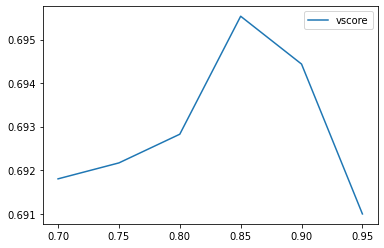

In [19]:
import matplotlib.pyplot as plt
plt.plot([0.7, 0.75, 0.8, 0.85, 0.9, 0.95], vscore, label = 'vscore')
plt.legend()

In [22]:
# 3) 최적의 차원 개수로 실제 데이터 셋에 적용 및 제출 => 0.85
# 3-1) 인공변수 생성
from sklearn.decomposition import PCA
m_pca = PCA(n_components = 0.85)                 
m_pca.fit(x_h_control)                           # 499개의 통제된 데이터의 Q_Ques만 가지고 fitting
x_pca = m_pca.transform(x)                       # 위 fitting을 전체 Q_Ques에 적용하여 인공변수 뽑아냄
df2_pca = m_pca.transform(df2_1)                 # df2에도 똑같이 적용
    
# 3-2) 인공변수 대입
# 인공변수만을 가지는 데이터프레임 d1, d2 생성
s1_columns = np.arange(1, len(x_pca[1]) + 1)
d1 = DataFrame(x_pca, columns = s1_columns)
d2 = DataFrame(df2_pca, columns = s1_columns)

# tpscore, human(engnat, familysize, hand 제외) 컬럼을 가지는 데이터프레임 col1, col2 생성
col1 = df1.drop(['voted'], axis = 1).drop(Q_Ques, axis = 1).drop('engnat', axis = 1)
col2 = df2.drop(Q_Ques, axis = 1).drop('engnat', axis = 1)

c1 = d1.columns.tolist()
c2 = col1.columns.tolist()
c3 = c1 + c2

# d1, d2에 나머지 컬럼데이터 추가
df1_new = DataFrame(np.hstack([d1, col1]), columns = c3)
# df1_new['y'] = y => automl용
df2_new = DataFrame(np.hstack([d2, col2]), columns = c3)    

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df1_new, y, random_state= 0)

v_score_te = [] ; v_score_tr = []
for i in range(1, 101) :
    m_rf = rf(random_state = 0, n_estimators = i)
    m_rf.fit(train_x, train_y)
    v_score_tr.append(m_rf.score(train_x, train_y))
    v_score_te.append(m_rf.score(test_x, test_y))
    
max(v_score_te)    # 0.698059
Series(v_score_te).sort_values(ascending = False)    # i = 98일때 best score    

97    0.698059
99    0.697971
98    0.697619
91    0.696477
96    0.696038
        ...   
4     0.639989
3     0.632346
2     0.625494
1     0.607485
0     0.599578
Length: 100, dtype: float64

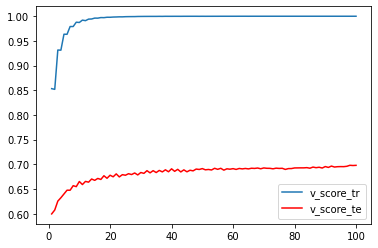

In [23]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 101), v_score_tr, label = 'v_score_tr')
plt.plot(np.arange(1, 101), v_score_te, label = 'v_score_te', color = 'red')
plt.legend()    

In [37]:
# RF
m_rf = rf(random_state = 0, n_estimators = 98)
m_rf.fit(df1_new, y)

pred_y = m_rf.predict(df2_new)
submission['voted'] = pred_y

0.6980585083018537

In [38]:
sum(submission['voted'] == 1)

45

In [39]:
sum(submission['voted'] == 2)

11338

In [ ]:
submission.to_csv('sample_submission_PCA2.csv')    # 0.52

In [137]:
d1

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.865802,2.404334,2.244943,-0.415068,-0.524693,-1.446414,0.836079,-0.559809,0.880315,-0.328040,-1.433619,0.361147,-0.520829
1,4.205968,1.136244,-0.205208,0.670677,-0.102764,0.027977,-0.191369,-3.213759,2.234035,-2.949115,-0.207305,-0.456488,-1.403873
2,6.235524,-0.334192,-0.228137,1.850478,0.261698,-0.185992,-1.843793,-0.340082,-0.048470,0.824354,0.533293,0.154707,0.586505
3,1.546294,1.799930,-1.404865,0.525438,-0.347882,0.690145,0.736438,-0.950179,-0.215086,-0.064739,-0.042499,0.753891,-0.228546
4,3.192598,-0.196100,-0.015521,-2.653578,-0.926672,0.834665,0.219018,-1.335776,0.402976,1.267075,0.288784,1.892694,-0.107763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,-0.740567,-1.127909,0.210482,-0.579772,-0.192192,-0.425656,0.554787,-0.541426,1.241476,-0.696852,0.243550,-0.975641,-0.246344
45528,-0.018127,-0.133967,-0.699562,-0.239913,-1.064507,-0.718068,-0.712836,-0.297783,-0.006320,0.168459,0.410070,0.060573,0.022643
45529,7.484708,0.443304,-0.230036,1.758873,-0.014944,0.080838,-0.906751,-0.540621,-0.593652,0.022474,0.710528,-0.724497,-0.659695
45530,3.649580,-1.517242,1.119895,-1.500373,0.338246,0.568203,1.396433,-0.624016,-0.671794,-0.154258,-0.063826,-0.918621,-0.147546


In [138]:
col1

,education,married,urban,gender_code,age_group_code,race_code,religion_code,sung,chin,jung,kyung,why
index,,,,,,,,,,,,
0,2,3,1,0,3,6,10,5.0,1.5,2.5,4.5,3.5
1,4,1,3,0,2,1,7,6.0,3.0,4.0,5.5,4.5
2,3,2,2,1,3,6,10,6.5,4.5,6.0,4.0,5.0
3,4,1,3,0,2,1,7,5.0,5.5,4.0,5.0,4.5
4,3,2,1,1,2,6,0,6.5,4.5,6.0,7.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2,1,3,0,1,6,8,1.0,3.5,1.5,5.0,6.5
45528,2,1,1,1,3,6,1,5.0,3.5,5.0,6.0,4.5
45529,2,1,2,0,1,6,5,4.0,6.0,5.5,7.0,2.5


In [139]:
df1_new

,1,2,3,4,5,6,7,8,9,10,...,urban,gender_code,age_group_code,race_code,religion_code,sung,chin,jung,kyung,why
0,2.865802,2.404334,2.244943,-0.415068,-0.524693,-1.446414,0.836079,-0.559809,0.880315,-0.328040,...,1.0,0.0,3.0,6.0,10.0,5.0,1.5,2.5,4.5,3.5
1,4.205968,1.136244,-0.205208,0.670677,-0.102764,0.027977,-0.191369,-3.213759,2.234035,-2.949115,...,3.0,0.0,2.0,1.0,7.0,6.0,3.0,4.0,5.5,4.5
2,6.235524,-0.334192,-0.228137,1.850478,0.261698,-0.185992,-1.843793,-0.340082,-0.048470,0.824354,...,2.0,1.0,3.0,6.0,10.0,6.5,4.5,6.0,4.0,5.0
3,1.546294,1.799930,-1.404865,0.525438,-0.347882,0.690145,0.736438,-0.950179,-0.215086,-0.064739,...,3.0,0.0,2.0,1.0,7.0,5.0,5.5,4.0,5.0,4.5
4,3.192598,-0.196100,-0.015521,-2.653578,-0.926672,0.834665,0.219018,-1.335776,0.402976,1.267075,...,1.0,1.0,2.0,6.0,0.0,6.5,4.5,6.0,7.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,-0.740567,-1.127909,0.210482,-0.579772,-0.192192,-0.425656,0.554787,-0.541426,1.241476,-0.696852,...,3.0,0.0,1.0,6.0,8.0,1.0,3.5,1.5,5.0,6.5
45528,-0.018127,-0.133967,-0.699562,-0.239913,-1.064507,-0.718068,-0.712836,-0.297783,-0.006320,0.168459,...,1.0,1.0,3.0,6.0,1.0,5.0,3.5,5.0,6.0,4.5
45529,7.484708,0.443304,-0.230036,1.758873,-0.014944,0.080838,-0.906751,-0.540621,-0.593652,0.022474,...,2.0,0.0,1.0,6.0,5.0,4.0,6.0,5.5,7.0,2.5
45530,3.649580,-1.517242,1.119895,-1.500373,0.338246,0.568203,1.396433,-0.624016,-0.671794,-0.154258,...,0.0,1.0,4.0,6.0,1.0,5.0,3.5,5.0,6.0,4.0
